In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import leukemiadrugscreen as leukdev
import numpy as np

df = pd.read_excel("ec50_emax_results_arrange.xlsx", index_col = 0)
df_nela = df[df["drug3name"] == "Nelarabine"]
df_pred = df[df["drug3name"] == "Prednisolone"]
df_pred = df_pred.reset_index()



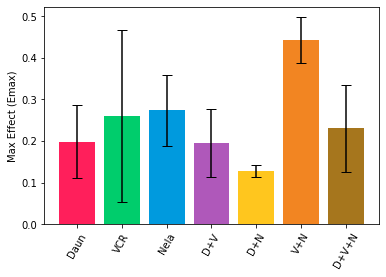

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

d1_name = "Daunorubicin"
d2_name = "Vincristine"
d3_name = "Nelarabine"

labels = [
    "Daun",
    "VCR",
    "Nela",
    d1_name[0] + "+" + d2_name[0],
    d1_name[0] + "+" + d3_name[0],
    d2_name[0] + "+" + d3_name[0],
    d1_name[0] + "+" + d2_name[0] + "+" + d3_name[0]
]
#labels = ["E1", "E2", "E3", "E12", "E13", "E23", "E123"]
data = [df_nela["E1"].mean(), df_nela["E2"].mean(), df_nela["E3"].mean(), df_nela["E12"].mean(), df_nela["E13"].mean(), df_nela["E23"].mean(), df_nela["E123"].mean()]
error = [df_nela["E1"].std(), df_nela["E2"].std(), df_nela["E3"].std(), df_nela["E12"].std(), df_nela["E13"].std(), df_nela["E23"].std(), df_nela["E123"].std()]


color2 = ["#ff1f5b", "#00cd6c", "#009ade", "#af58ba", "#ffc61e", "#f28522", "#a6761d"]
ax.bar(labels, data, yerr = error, color = color2, capsize=5)
ax.set_ylabel("Max Effect (Emax)")
#ax.axhline(min(E1,E2,E3), color = "0.2", linestyle = "dotted", label = "Single Drug Max")
#ax.axhline(min(E1,E2,E3,E12,E13,E23), color = "0.2", linestyle = "dashed", label = "Overall Max")
#ax.legend()
plt.xticks(rotation = 60)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


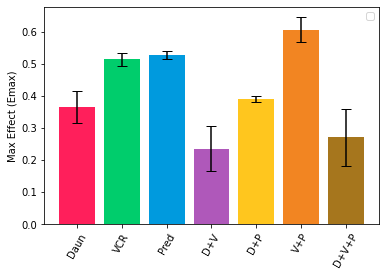

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

d1_name = "Daunorubicin"
d2_name = "Vincristine"
d3_name = "Prednisolone"

labels = [
    "Daun",
    "VCR",
    "Pred",
    d1_name[0] + "+" + d2_name[0],
    d1_name[0] + "+" + d3_name[0],
    d2_name[0] + "+" + d3_name[0],
    d1_name[0] + "+" + d2_name[0] + "+" + d3_name[0]
]
#labels = ["E1", "E2", "E3", "E12", "E13", "E23", "E123"]
data = [df_pred["E1"].mean(), df_pred["E2"].mean(), df_pred["E3"].mean(), df_pred["E12"].mean(), df_pred["E13"].mean(), df_pred["E23"].mean(), df_pred["E123"].mean()]
error = [df_pred["E1"].std(), df_pred["E2"].std(), df_pred["E3"].std(), df_pred["E12"].std(), df_pred["E13"].std(), df_pred["E23"].std(), df_pred["E123"].std()]

color2 = ["#ff1f5b", "#00cd6c", "#009ade", "#af58ba", "#ffc61e", "#f28522", "#a6761d"]
colors = ["tab:red", "tab:green", "tab:blue", "y", "m", "c", "0.4"]
ax.bar(labels, data, yerr = error, color = color2, capsize=5)
ax.set_ylabel("Max Effect (Emax)")
#ax.axhline(min(E1,E2,E3), color = "0.2", linestyle = "dotted", label = "Single Drug Max")
#ax.axhline(min(E1,E2,E3,E12,E13,E23), color = "0.2", linestyle = "dashed", label = "Overall Max")
ax.legend()
plt.xticks(rotation = 60)
plt.show()

[-0.20838239  0.03356479  0.03356479 -0.14854222]
[0.05812501 0.03543181 0.03543181 0.03401772]


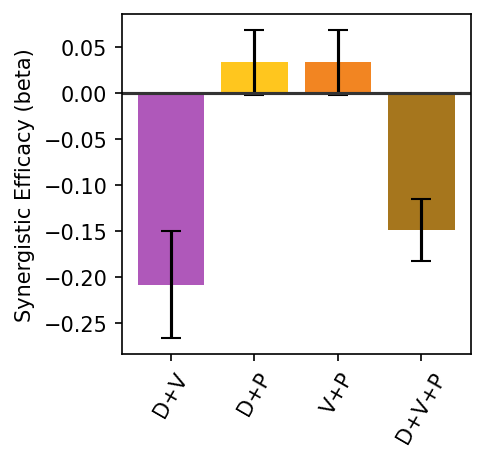

In [19]:
# beta plot
colors = ["#ff1f5b", "#00cd6c", "#009ade", "#af58ba", "#ffc61e", "#f28522", "#a0b1ba", "#a6761d"]

fig = plt.figure(figsize = (3,3), dpi = 150)
ax = fig.add_subplot(111)

d1_name = "Daunorubicin"
d2_name = "Vincristine"
d3_name = "Prednisolone"

labels = [
    d1_name[0] + "+" + d2_name[0],
    d1_name[0] + "+" + d3_name[0],
    d2_name[0] + "+" + d3_name[0],
    d1_name[0] + "+" + d2_name[0] + "+" + d3_name[0]
]

def multi_beta(E1, E2, E12):
    beta = []
    for i in range(len(E1)):
        beta.append(leukdev.beta(E1[i], E2[i], E12[i]))
    return np.array(beta)

def multi_beta3(E1, E2, E3, E123):
    beta = []
    for i in range(len(E1)):
        beta.append(leukdev.beta3(E1[i], E2[i], E3[i], E123[i]))
    return np.array(beta)


beta12 = multi_beta(df_pred["E1"], df_pred["E2"], df_pred["E12"])
beta13 = multi_beta(df_pred["E1"], df_pred["E3"], df_pred["E13"])
beta23 = multi_beta(df_pred["E1"], df_pred["E3"], df_pred["E13"])
beta123 = multi_beta3(df_pred["E1"], df_pred["E2"], df_pred["E3"], df_pred["E123"])
betapair = multi_beta3(df_pred["E12"], df_pred["E13"], df_pred["E23"], df_pred["E123"])

data = np.array([
    beta12.mean(),
    beta13.mean(),
    beta23.mean(),
    beta123.mean()
])
data = data * -1

error = np.array([
    beta12.std(),
    beta13.std(),
    beta23.std(),
    beta123.std()
])
error = error / np.sqrt(len(beta12))

print(data)
print(error)


colors = [color2[3], color2[4], color2[5], color2[6]]
ax.bar(labels, data, yerr = error, capsize = 5, color = colors)
ax.set_ylabel("Synergistic Efficacy (beta)")
plt.xticks(rotation = 60)
ax.axhline(0, color = "0.2", label = "Single Drug Max")
plt.show()

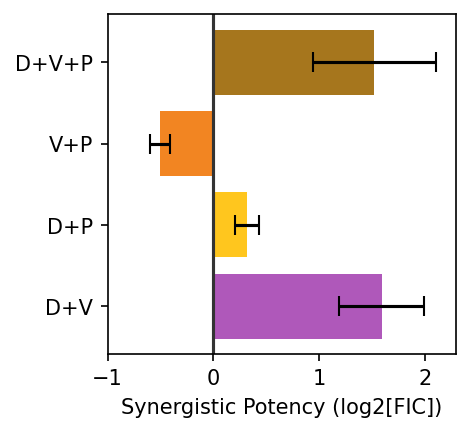

In [37]:
# potency plot
colors = ["#ff1f5b", "#00cd6c", "#009ade", "#af58ba", "#ffc61e", "#f28522", "#a0b1ba", "#a6761d"]

data = df_pred

fig = plt.figure(figsize = (3,3), dpi = 150)
ax = fig.add_subplot(111)

d1_name = "Daunorubicin"
d2_name = "Vincristine"
d3_name = "Prednisolone"

labels = [
    d1_name[0] + "+" + d2_name[0],
    d1_name[0] + "+" + d3_name[0],
    d2_name[0] + "+" + d3_name[0],
    d1_name[0] + "+" + d2_name[0] + "+" + d3_name[0]
]


bardata = np.array([
    data["C12"].mean(),
    data["C13"].mean(),
    data["C23"].mean(),
    data["C123"].mean()
])
bardata = np.log2(bardata)

error = np.array([
    data["C12"].std(),
    data["C13"].std(),
    data["C23"].std(),
    data["C123"].std()
])
error = error / np.sqrt(len(data["C12"]))


colors = [color2[3], color2[4], color2[5], color2[6]]
ax.barh(labels, bardata, xerr = error, capsize = 5, color = colors)
ax.set_xlabel("Synergistic Potency (log2[FIC])")
ax.set_xlim(-1, 2.3)
ax.axvline(0, color = "0.2", label = "Single Drug Max")
plt.show()